# Is Bitcoin under theoretical and empirical aspects money?
Carl von Ossietzky Universität Oldenburg \
examiner: Prof. Dr. Hans-Michael Trautwein \
author: Henning Siept Dinkela

###### This is the Python code for the empirical investigation of the money functions of Bitcoin. I mainly used Python for data manipulation and data cleaning. For regression of econometric models I used R, which is also available in this github repo.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
plt.style.use("ggplot")

##### Data Preperation

###### Data is from https://finance.yahoo.com/quote/BTC-USD/history?period1=1410912000&period2=1692230400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true last access: 17.08.2023 at 17:46 https://coincodex.com/crypto/bitcoin/historical-data/ last access: 20.08.2023 at 20:45

In [36]:
data = pd.read_csv("BTC-USD.csv") # yahoo finance

In [37]:
bitcoin_supply_data = pd.read_csv("btc_supply_daily.csv") # https://data.nasdaq.com/data/BCHAIN/TOTBC-total-bitcoins

In [38]:
df = pd.DataFrame(data)

In [39]:
df_s = pd.DataFrame(bitcoin_supply_data)
df_s.rename(columns={'Value': 'Supply'}, inplace=True)

In [40]:
daily_tweets_data = pd.read_csv("daily_tweets.csv")

In [41]:
df_t = pd.DataFrame(daily_tweets_data)

In [42]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [43]:
df_s.head()

,Date,Supply
0,2023-08-20,19463175.00
1,2023-08-19,19462268.75
2,2023-08-18,19461368.75
3,2023-08-17,19460468.75
4,2023-08-16,19459562.50


In [44]:
df_t

,Date,Tweets
0,2014-04-09,8193.0
1,2014-04-10,15039.0
2,2014-04-11,14907.0
3,2014-04-12,7582.0
4,2014-04-13,10674.0
...,...,...
3257,2023-03-10,120160.0
3258,2023-03-11,107064.0
3259,2023-03-12,120467.0
3260,2023-03-13,198796.0


In [74]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-08-13,29416.593750,29441.433594,29265.806641,29282.914063,29282.914063,7329897180
2023-08-14,29283.263672,29660.253906,29124.105469,29408.443359,29408.443359,14013695304
2023-08-15,29408.048828,29439.121094,29088.853516,29170.347656,29170.347656,12640195779


In [75]:
df_s = df_s.iloc[::-1].reset_index(drop=True) # reversing the data to have oldest = first value and newest = last value 

In [76]:
df_s

,Date,Supply
0,2023-08-20,19463175.00
1,2023-08-19,19462268.75
2,2023-08-18,19461368.75
3,2023-08-17,19460468.75
4,2023-08-16,19459562.50
...,...,...
5339,2009-01-06,50.00
5340,2009-01-05,50.00
5341,2009-01-04,50.00
5342,2009-01-03,50.00


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3257 entries, 2014-09-17 to 2023-08-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3257 non-null   float64
 1   High       3257 non-null   float64
 2   Low        3257 non-null   float64
 3   Close      3257 non-null   float64
 4   Adj Close  3257 non-null   float64
 5   Volume     3257 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.1 KB


In [78]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5344 entries, 0 to 5343
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5344 non-null   object 
 1   Supply  5344 non-null   float64
dtypes: float64(1), object(1)
memory usage: 83.6+ KB


In [79]:
df.shape

(3257, 6)

In [80]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-08-13,29416.593750,29441.433594,29265.806641,29282.914063,29282.914063,7329897180
2023-08-14,29283.263672,29660.253906,29124.105469,29408.443359,29408.443359,14013695304
2023-08-15,29408.048828,29439.121094,29088.853516,29170.347656,29170.347656,12640195779


In [81]:
df["Date"] = pd.to_datetime(df["Date"])

KeyError: 'Date'

In [ ]:
df.set_index('Date', inplace=True) #nur für Graphik ausführen

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-08-13,29416.593750,29441.433594,29265.806641,29282.914063,29282.914063,7329897180
2023-08-14,29283.263672,29660.253906,29124.105469,29408.443359,29408.443359,14013695304
2023-08-15,29408.048828,29439.121094,29088.853516,29170.347656,29170.347656,12640195779


In [82]:
p1 = df.iloc[0]["Open"]

In [83]:
p2 = df.iloc[-1]["Open"]
p2

28715.777344

In [84]:
p3 = float(df[df["Open"] == df["Open"].max()].get("Open"))
p3

67549.734375

In [85]:
r1 = (p2-p1)/p1*100
r1

6063.982724795738

In [86]:
r2 = (p3-p1)/p1*100
r2

14399.88244316291

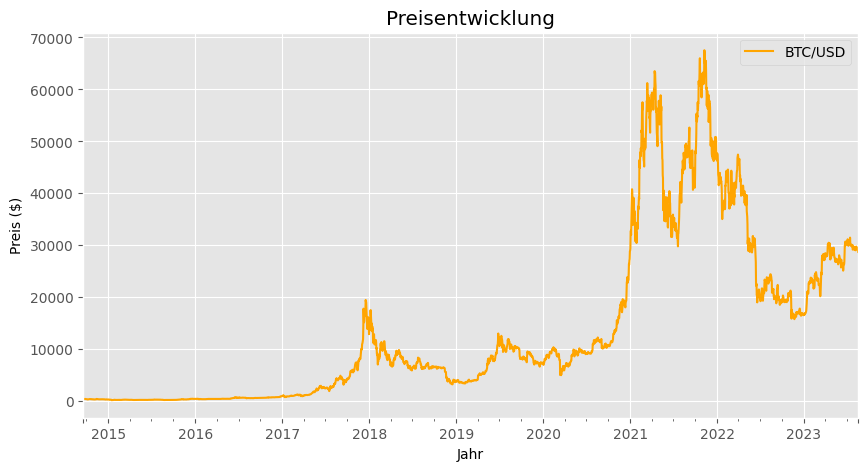

In [87]:
ax = df.plot(y = 'Open', kind = 'line', figsize=(10, 5), color="orange", label='BTC/USD')

# Legende anzeigen
plt.ylabel("Preis ($)")
plt.xlabel("Jahr")
plt.legend()
plt.title("Preisentwicklung")
# Plot anzeigen
plt.show()  

In [88]:
df = df.drop(columns=["High", "Low", "Adj Close", "Volume"])

In [89]:
vola = (df["Close"] - df["Open"])/df["Open"]*100

In [90]:
vola_ln = np.log(df["Close"] / df["Open"])*100

In [91]:
vola

Date
2014-09-17   -1.831006
2014-09-18   -7.096262
2014-09-19   -6.910351
2014-09-20    3.605767
2014-09-21   -2.270110
                ...   
2023-08-13   -0.454436
2023-08-14    0.427479
2023-08-15   -0.808286
2023-08-16   -1.602022
2023-08-17   -2.296110
Length: 3257, dtype: float64

In [92]:
vola_ln

Date
2014-09-17   -1.847977
2014-09-18   -7.360631
2014-09-19   -7.160719
2014-09-20    3.542281
2014-09-21   -2.296273
                ...   
2023-08-13   -0.455472
2023-08-14    0.426568
2023-08-15   -0.811570
2023-08-16   -1.614993
2023-08-17   -2.322881
Length: 3257, dtype: float64

In [93]:
df["Price Change (in %)"] = vola_ln

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3257 entries, 2014-09-17 to 2023-08-17
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open                 3257 non-null   float64
 1   Close                3257 non-null   float64
 2   Price Change (in %)  3257 non-null   float64
dtypes: float64(3)
memory usage: 101.8 KB


In [95]:
df["Date"] = pd.to_datetime(df["Date"]) # Für Regressionsdaten ausführen

KeyError: 'Date'

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3257 entries, 2014-09-17 to 2023-08-17
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open                 3257 non-null   float64
 1   Close                3257 non-null   float64
 2   Price Change (in %)  3257 non-null   float64
dtypes: float64(3)
memory usage: 101.8 KB


In [98]:
df["Vola"] = df["Price Change (in %)"].rolling(30).std()

In [99]:
df[df["Vola"] == df["Vola"].max()] # get maximum of volatility with date etc.

,Open,Close,Price Change (in %),Vola
Date,,,,
2020-04-06,6788.049805,7271.78125,6.883759,10.323018


In [100]:
df[df["Vola"] == df["Vola"].min()] # get minimum of volatility with date etc.

,Open,Close,Price Change (in %),Vola
Date,,,,
2016-10-09,619.171997,616.752014,-0.391608,0.709243


In [101]:
df_s["Date"] = pd.to_datetime(df_s["Date"])

In [102]:
df_t["Date"] = pd.to_datetime(df_t["Date"])

In [103]:
df_regression = pd.merge(df, df_s, on='Date', how='inner')
df_regression = pd.merge(df_regression, df_t, on='Date', how='inner')

In [104]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 0 to 3100
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 3101 non-null   datetime64[ns]
 1   Open                 3101 non-null   float64       
 2   Close                3101 non-null   float64       
 3   Price Change (in %)  3101 non-null   float64       
 4   Vola                 3072 non-null   float64       
 5   Supply               3101 non-null   float64       
 6   Tweets               3045 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 193.8 KB


In [105]:
df_regression.columns = ["date", "open", "close", "delta_price", "vola", "btc", "twtr"]

In [106]:
df_regression.dropna()

,date,open,close,delta_price,vola,btc,twtr
29,2014-10-16,394.518005,382.556000,-3.078973,3.929193,13389925.00,24445.0
30,2014-10-17,382.756012,383.757996,0.261439,3.925964,13398050.00,21491.0
31,2014-10-18,383.976013,391.441986,1.925724,3.734644,13401400.00,20572.0
32,2014-10-19,391.253998,389.545990,-0.437503,3.501603,13401650.00,18259.0
33,2014-10-20,389.230988,382.845001,-1.654276,3.445854,13408350.00,23312.0
...,...,...,...,...,...,...,...
3096,2023-03-10,20367.001953,20187.244141,-0.886511,2.830922,19313787.50,120160.0
3097,2023-03-11,20187.876953,20632.410156,2.178087,2.730530,19314656.25,107064.0
3098,2023-03-12,20628.029297,22163.949219,7.181626,3.040426,19315843.75,120467.0
3099,2023-03-13,22156.406250,24197.533203,8.812402,3.431566,19316837.50,198796.0


In [107]:
df_regression.to_csv('regression_data_set.csv', index=False)

In [108]:
df[28:]

,Open,Close,Price Change (in %),Vola
Date,,,,
2014-10-15,400.954987,394.773010,-1.553823,NaN
2014-10-16,394.518005,382.556000,-3.078973,3.929193
2014-10-17,382.756012,383.757996,0.261439,3.925964
2014-10-18,383.976013,391.441986,1.925724,3.734644
2014-10-19,391.253998,389.545990,-0.437503,3.501603
...,...,...,...,...
2023-08-13,29416.593750,29282.914063,-0.455472,0.894157
2023-08-14,29283.263672,29408.443359,0.426568,0.899836
2023-08-15,29408.048828,29170.347656,-0.811570,0.908955


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3257 entries, 2014-09-17 to 2023-08-17
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open                 3257 non-null   float64
 1   Close                3257 non-null   float64
 2   Price Change (in %)  3257 non-null   float64
 3   Vola                 3228 non-null   float64
dtypes: float64(4)
memory usage: 127.2 KB


##### Value at Risk

In [113]:
df

,Open,Close,Price Change (in %),Vola
Date,,,,
2014-09-17,465.864014,457.334015,-1.847977,NaN
2014-09-18,456.859985,424.440002,-7.360631,NaN
2014-09-19,424.102997,394.795990,-7.160719,NaN
2014-09-20,394.673004,408.903992,3.542281,NaN
2014-09-21,408.084991,398.821014,-2.296273,NaN
...,...,...,...,...
2023-08-13,29416.593750,29282.914063,-0.455472,0.894157
2023-08-14,29283.263672,29408.443359,0.426568,0.899836
2023-08-15,29408.048828,29170.347656,-0.811570,0.908955


In [114]:
df[df["Price Change (in %)"] == df["Price Change (in %)"].min()]

,Open,Close,Price Change (in %),Vola
Date,,,,
2020-03-12,7913.616211,4970.788086,-46.500645,8.812052


In [115]:
meanv = df["Price Change (in %)"].mean()
meanv

0.1186509788357778

In [116]:
stdv = df["Price Change (in %)"].std()
stdv

3.7678119922366164

In [117]:
z_value = [-1.65, -2.33]

In [118]:
var_5 = z_value[0]*stdv + meanv
var_5

-6.0982388083546395

Text(0.5, 1.0, 'Verteilung der Preisänderungsraten')

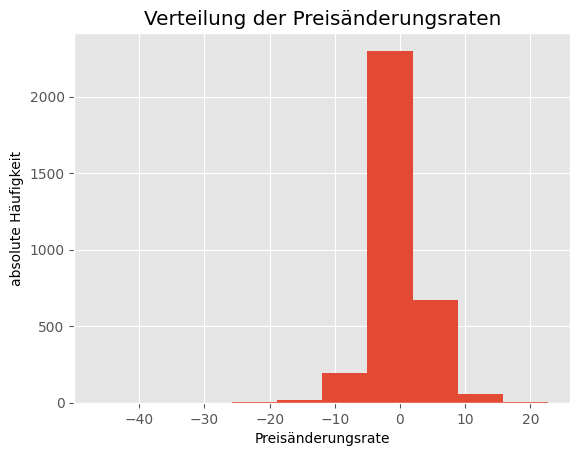

In [119]:
plt.hist(df["Price Change (in %)"], bins=10)
plt.xlabel('Preisänderungsrate')
plt.ylabel('absolute Häufigkeit')
plt.title('Verteilung der Preisänderungsraten')

In [120]:
alpha = 0.05

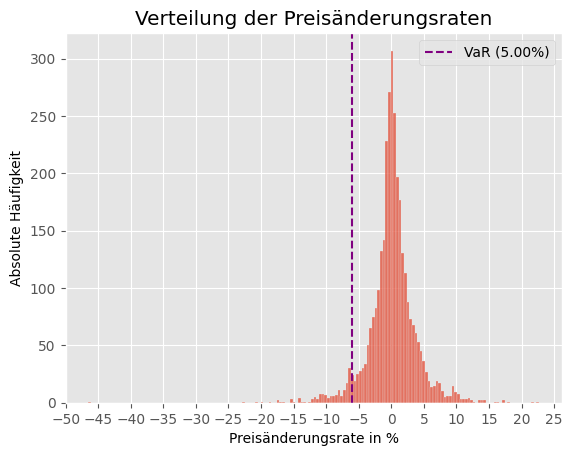

In [121]:
sns.histplot(data=df, x="Price Change (in %)", stat="count")
plt.xlabel('Preisänderungsrate in %')
plt.ylabel('Absolute Häufigkeit')
plt.title('Verteilung der Preisänderungsraten')

var = np.percentile(df["Price Change (in %)"], 100 * alpha)

# Vertikale Linie für den VaR einzeichnen
plt.axvline(var, color='purple', linestyle='--', label=f'VaR ({alpha*100:.2f}%)')

plt.xticks(range(-50, 30, 5))

plt.legend()

In [122]:
var

-6.0647048437236455

In [123]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
shapiro(df["Price Change (in %)"])



ShapiroResult(statistic=0.9026855230331421, pvalue=1.979614340551669e-41)

In [124]:
from scipy.stats import kstest

kstest(df["Price Change (in %)"], 'norm')

KstestResult(statistic=0.2063604096299564, pvalue=4.0786867612529423e-122, statistic_location=1.4023421222399812, statistic_sign=-1)

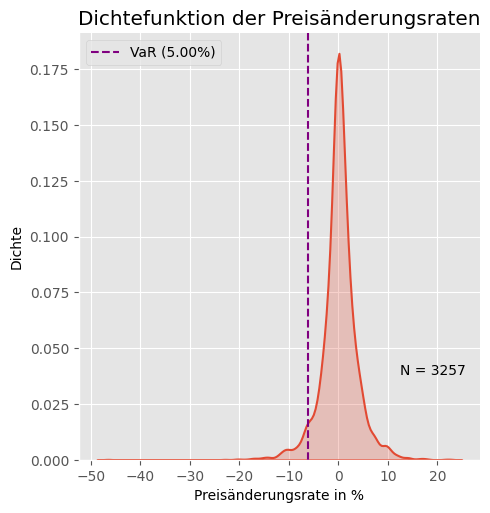

In [125]:
sns.displot(df, x="Price Change (in %)", kind="kde", fill=True, linewidth=1.5)
plt.text(0.8, 0.2, "N = {}".format(len(df["Price Change (in %)"])), transform=plt.gca().transAxes)
plt.xlabel('Preisänderungsrate in %')
plt.ylabel('Dichte')
plt.title('Dichtefunktion der Preisänderungsraten')
plt.axvline(var, color='purple', linestyle='--', label=f'VaR ({alpha*100:.2f}%)')
plt.legend(loc="upper left")


In [126]:
from scipy.stats import skew 
  
# Calculate the skewness 
print(skew(df["Price Change (in %)"], axis=0, bias=True))


-0.7628914646860823


In [127]:
from scipy.stats import kurtosis 
  
# Calculate the kurtosis 
print(kurtosis(df["Price Change (in %)"], axis=0, bias=True))

11.288944103585807


##### Plotting Bitcoin Volatility

Text(0.5, 0, 'Jahr')

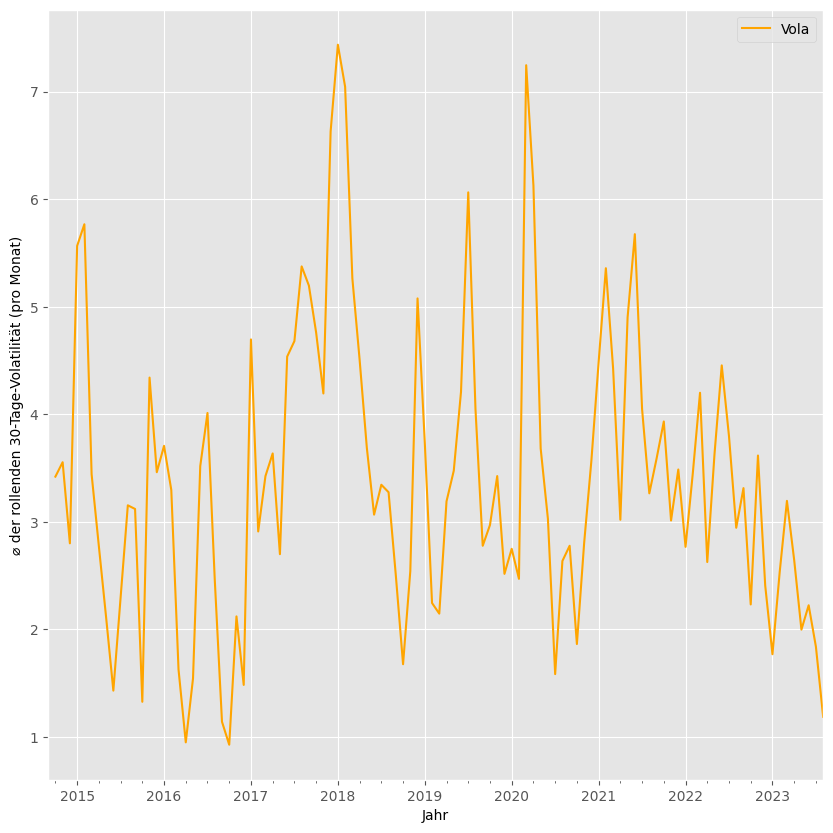

In [110]:
df_months.plot(y = 'Vola', kind = 'line', figsize=(10, 10), color="orange")
plt.ylabel("⌀ der rollenden 30-Tage-Volatilität (pro Monat)")
plt.xlabel("Jahr")

In [456]:
#df['Number'] = np.arange(len(df))+1

In [45]:
df

,Date,Open,Close,Price Change (in %),Vola
0,2014-09-17,465.864014,457.334015,-1.847977,NaN
1,2014-09-18,456.859985,424.440002,-7.360631,NaN
2,2014-09-19,424.102997,394.795990,-7.160719,NaN
3,2014-09-20,394.673004,408.903992,3.542281,NaN
4,2014-09-21,408.084991,398.821014,-2.296273,NaN
...,...,...,...,...,...
3252,2023-08-13,29416.593750,29282.914063,-0.455472,0.894157
3253,2023-08-14,29283.263672,29408.443359,0.426568,0.899836
3254,2023-08-15,29408.048828,29170.347656,-0.811570,0.908955
3255,2023-08-16,29169.074219,28701.779297,-1.614993,0.948073


In [46]:
df.set_index('Date', inplace=True)

In [47]:
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-08-08', '2023-08-09', '2023-08-10', '2023-08-11',
               '2023-08-12', '2023-08-13', '2023-08-14', '2023-08-15',
               '2023-08-16', '2023-08-17'],
              dtype='datetime64[ns]', name='Date', length=3257, freq=None)

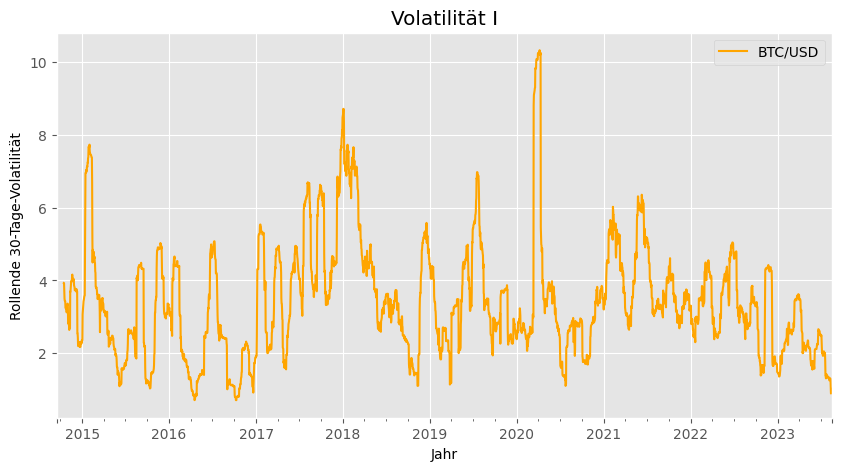

In [48]:
ax = df.plot(y = 'Vola', kind = 'line', figsize=(10, 5), color="orange", label='BTC/USD')

# Legende anzeigen
plt.ylabel("Rollende 30-Tage-Volatilität")
plt.xlabel("Jahr")
plt.legend()
plt.title("Volatilität I")
# Plot anzeigen
plt.show()  

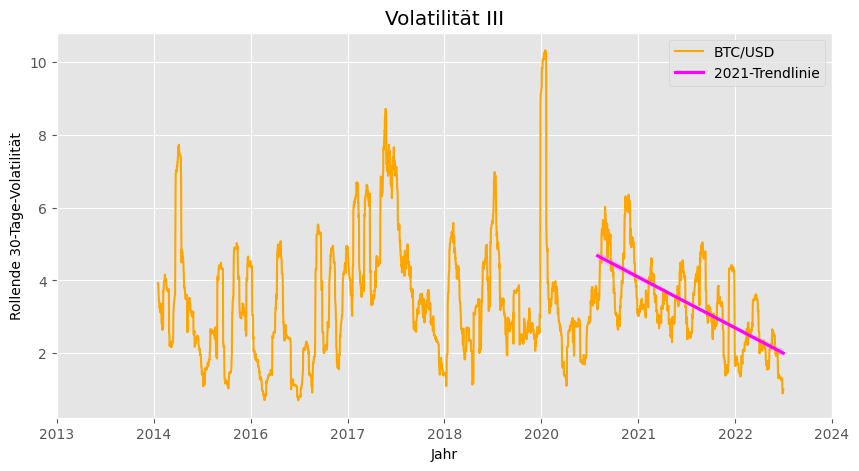

In [28]:
import seaborn as sns

df.index = df.index.map(pd.Timestamp.toordinal)

ax = df.plot(y = 'Vola', kind = 'line', figsize=(10, 5), color="orange", label='BTC/USD')


# Trendlinie hinzufügen
# convert the regression line start date to ordinal
x1 = pd.to_datetime('2021-01-01').toordinal()

# data slice for the regression line
data_sample = df.loc[x1:].reset_index()

# add a regression line
sns.regplot(data=data_sample, x='Date', y='Vola', ax=ax, color='magenta', scatter_kws={'s': 7}, label='2021-Trendlinie', scatter=False)

#ax.set_xlim(df.index[0], df.index[-1])

# convert the axis back to datetime
xticks = ax.get_xticks()
labels = [pd.Timestamp.fromordinal(int(label)).strftime("%Y") for label in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)

# Legende anzeigen
plt.ylabel("Rollende 30-Tage-Volatilität")
plt.xlabel("Jahr")
plt.legend()
plt.title("Volatilität III")
# Plot anzeigen
plt.show()

In [431]:
#import sklearn as skl

In [ ]:
# create the model
model = LinearRegression()

# extract x and y from dataframe data
x = data[['Date']]
y = data[['Adj Close']]

# fit the mode
model.fit(x, y)

# print the slope and intercept if desired
print('intercept:', model.intercept_)
print('slope:', model.coef_)

In [122]:
df_year = df.resample("Y", on="Date").mean()

In [123]:
df_year

,Open,Close,Price Change (in %),Vola
Date,,,,
2014-12-31,365.058217,363.693085,-0.350761,3.223299
2015-12-31,272.149011,272.453381,0.077263,3.215468
2016-12-31,567.141429,568.492407,0.201065,2.230946
2017-12-31,3970.644848,4006.033629,0.717575,4.407353
2018-12-31,7601.018680,7572.298947,-0.370635,4.105667
2019-12-31,7385.218456,7395.246282,0.187000,3.410236
2020-12-31,11056.787201,11116.378092,0.378631,3.379715
2021-12-31,47402.115663,47436.932021,0.103257,4.092669
2022-12-31,28278.690293,28197.754099,-0.279839,3.283281


Text(0, 0.5, '⌀ der rollenden 30-Tage-Volatilität (pro Jahr)')

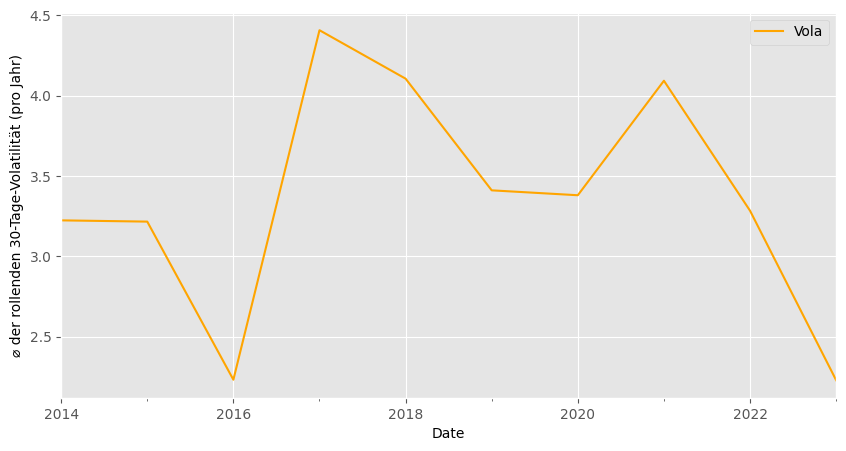

In [126]:
df_year.plot(y = 'Vola', kind = 'line', figsize=(10, 5), color="orange")
plt.ylabel("⌀ der rollenden 30-Tage-Volatilität (pro Jahr)")

##### US-Dollar volatility

In [54]:
usd = pd.read_csv("EUR=X.csv")

In [55]:
usd_df = pd.DataFrame(usd)

In [56]:
usd_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,0.83098,0.83724,0.83056,0.83577,0.83577,0.0
1,2003-12-02,0.83605,0.83710,0.82583,0.82720,0.82720,0.0
2,2003-12-03,0.82713,0.82802,0.82440,0.82488,0.82488,0.0
3,2003-12-04,0.82508,0.83029,0.82345,0.82775,0.82775,0.0
4,2003-12-05,0.82795,0.82878,0.82028,0.82055,0.82055,0.0
...,...,...,...,...,...,...,...
5059,2023-04-21,0.91150,0.91410,0.90971,0.91150,0.91150,0.0
5060,2023-04-24,0.90973,0.91168,0.90627,0.90973,0.90973,0.0
5061,2023-04-25,0.90420,0.91164,0.90350,0.90420,0.90420,0.0
5062,2023-04-26,0.91088,0.91164,0.90138,0.91088,0.91088,0.0


In [57]:
usd_df = usd_df.drop(columns=["High", "Low", "Adj Close", "Volume"])

In [58]:
usd_df

,Date,Open,Close
0,2003-12-01,0.83098,0.83577
1,2003-12-02,0.83605,0.82720
2,2003-12-03,0.82713,0.82488
3,2003-12-04,0.82508,0.82775
4,2003-12-05,0.82795,0.82055
...,...,...,...
5059,2023-04-21,0.91150,0.91150
5060,2023-04-24,0.90973,0.90973
5061,2023-04-25,0.90420,0.90420
5062,2023-04-26,0.91088,0.91088


In [59]:
vola_usd = (usd_df["Close"] - usd_df["Open"])/usd_df["Open"]*100

In [60]:
usd_df["Price Change (in %)"] = vola_usd

In [61]:
usd_df

,Date,Open,Close,Price Change (in %)
0,2003-12-01,0.83098,0.83577,0.576428
1,2003-12-02,0.83605,0.82720,-1.058549
2,2003-12-03,0.82713,0.82488,-0.272025
3,2003-12-04,0.82508,0.82775,0.323605
4,2003-12-05,0.82795,0.82055,-0.893774
...,...,...,...,...
5059,2023-04-21,0.91150,0.91150,0.000000
5060,2023-04-24,0.90973,0.90973,0.000000
5061,2023-04-25,0.90420,0.90420,0.000000
5062,2023-04-26,0.91088,0.91088,0.000000


In [62]:
usd_df["Date"] = pd.to_datetime(usd_df["Date"])

In [63]:
usd_df

,Date,Open,Close,Price Change (in %)
0,2003-12-01,0.83098,0.83577,0.576428
1,2003-12-02,0.83605,0.82720,-1.058549
2,2003-12-03,0.82713,0.82488,-0.272025
3,2003-12-04,0.82508,0.82775,0.323605
4,2003-12-05,0.82795,0.82055,-0.893774
...,...,...,...,...
5059,2023-04-21,0.91150,0.91150,0.000000
5060,2023-04-24,0.90973,0.90973,0.000000
5061,2023-04-25,0.90420,0.90420,0.000000
5062,2023-04-26,0.91088,0.91088,0.000000


In [64]:
usd_df["Vola"] = usd_df["Price Change (in %)"].rolling(30).std()

In [65]:
usd_df[4500:]

,Date,Open,Close,Price Change (in %),Vola
4500,2021-03-01,0.827068,0.82716,0.011124,0.010791
4501,2021-03-02,0.829940,0.82980,-0.016869,0.010599
4502,2021-03-03,0.827470,0.82744,-0.003626,0.010402
4503,2021-03-04,0.829990,0.82983,-0.019277,0.010623
4504,2021-03-05,0.835520,0.83558,0.007181,0.010885
...,...,...,...,...,...
5059,2023-04-21,0.911500,0.91150,0.000000,0.000000
5060,2023-04-24,0.909730,0.90973,0.000000,0.000000
5061,2023-04-25,0.904200,0.90420,0.000000,0.000000
5062,2023-04-26,0.910880,0.91088,0.000000,0.000000


Text(0.5, 0, 'Jahr')

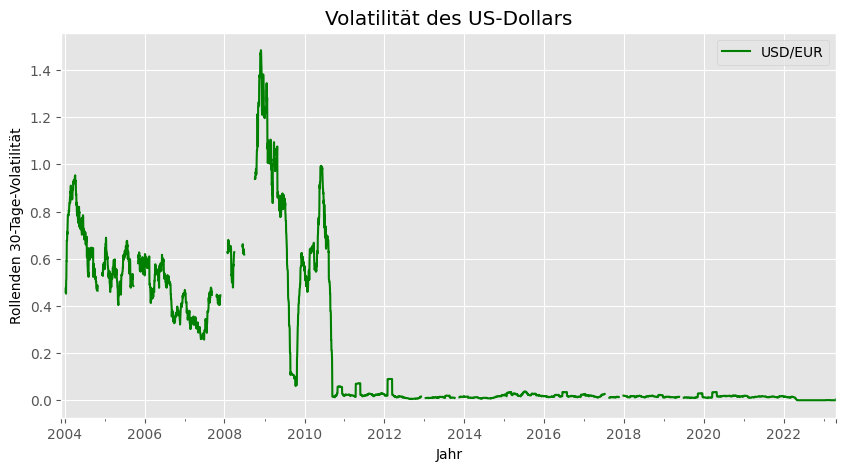

In [71]:
usd_df.plot(x = 'Date', y = 'Vola', kind = 'line', figsize=(10, 5), color="green", title="Volatilität des US-Dollars", label="USD/EUR")
plt.ylabel("Rollenden 30-Tage-Volatilität")
plt.xlabel("Jahr")

##### Gold volatility

In [60]:
gold = pd.read_csv("gold.csv")

In [61]:
gold_df = pd.DataFrame(gold)

In [62]:
gold_df

,Date,Close/Last,Volume,Open,High,Low
0,04/26/2023,1996.0,231110.0,2007.7,2020.2,1993.7
1,04/25/2023,2004.5,214107.0,1999.4,2014.5,1986.2
2,04/24/2023,1999.8,136854.0,1992.0,2001.5,1984.4
3,04/21/2023,1990.5,205700.0,2016.1,2016.8,1982.3
4,04/20/2023,2019.1,158915.0,2007.7,2024.2,2002.2
...,...,...,...,...,...,...
2536,05/03/2013,1464.2,159542.0,1466.2,1487.2,1455.4
2537,05/02/2013,1467.6,138096.0,1457.0,1473.3,1448.1
2538,05/01/2013,1446.2,154718.0,1475.6,1477.4,1439.7
2539,04/30/2013,1472.1,132453.0,1476.6,1479.5,1460.5


In [63]:
gold_df = gold_df.drop(columns=["High", "Low", "Volume"])

In [64]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2541 entries, 0 to 2540
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2541 non-null   object 
 1   Close/Last  2541 non-null   float64
 2   Open        2541 non-null   float64
dtypes: float64(2), object(1)
memory usage: 59.7+ KB


In [65]:
gold_df["Date"] = pd.to_datetime(gold_df["Date"])

In [66]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2541 entries, 0 to 2540
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2541 non-null   datetime64[ns]
 1   Close/Last  2541 non-null   float64       
 2   Open        2541 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 59.7 KB


In [68]:
vola_gold = (gold_df["Close/Last"] - gold_df["Open"])/gold_df["Open"]*100

In [71]:
gold_df['price change in %'] = vola_gold

In [72]:
gold_df

,Date,Close/Last,Open,pirce change in %,price change in %
0,2023-04-26,1996.0,2007.7,-0.582756,-0.582756
1,2023-04-25,2004.5,1999.4,0.255077,0.255077
2,2023-04-24,1999.8,1992.0,0.391566,0.391566
3,2023-04-21,1990.5,2016.1,-1.269778,-1.269778
4,2023-04-20,2019.1,2007.7,0.567814,0.567814
...,...,...,...,...,...
2536,2013-05-03,1464.2,1466.2,-0.136407,-0.136407
2537,2013-05-02,1467.6,1457.0,0.727522,0.727522
2538,2013-05-01,1446.2,1475.6,-1.992410,-1.992410
2539,2013-04-30,1472.1,1476.6,-0.304754,-0.304754


In [73]:
gold_df["Vola"] = gold_df["price change in %"].rolling(30).std()

<Axes: title={'center': 'Volatilität'}, xlabel='Date'>

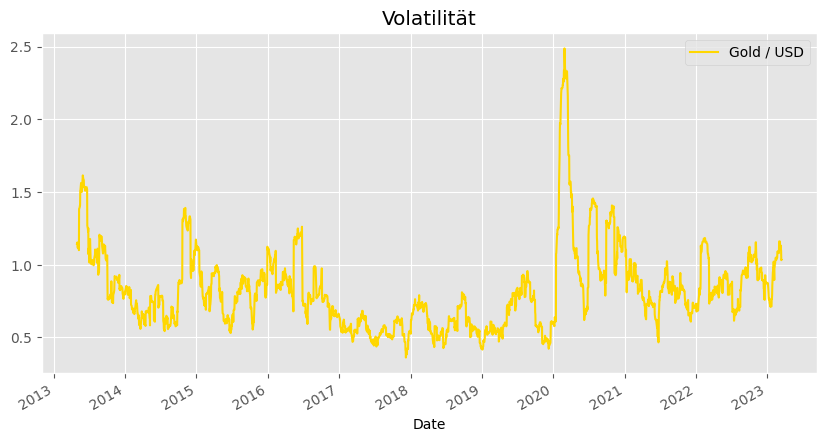

In [77]:
gold_df.plot(x = 'Date', y = 'Vola', kind = 'line', figsize=(10, 5), color="gold", title="Volatilität", label="Gold / USD")

# All volatilities in one plot

Text(0.5, 0, 'Jahre')

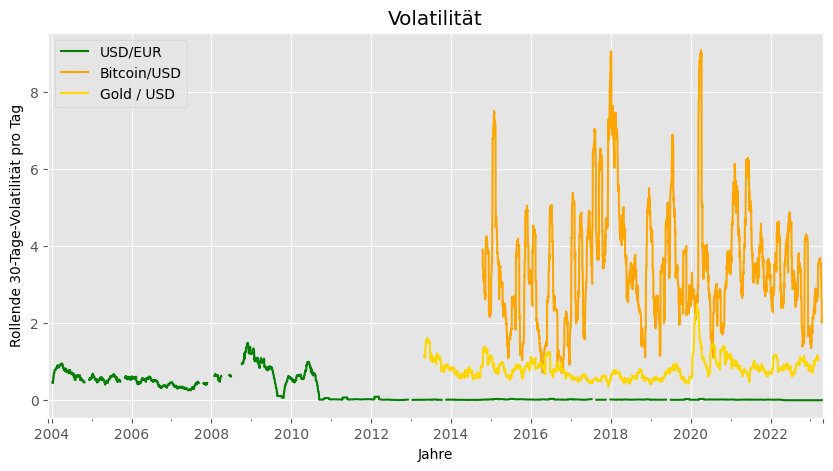

In [100]:
ax = usd_df.plot(x = 'Date', y = 'Vola', kind = 'line', figsize=(10, 5), color="green", title="Volatilität", label="USD/EUR")
df.plot(x = 'Date', y = 'Vola', kind = 'line', figsize=(10, 5), color="orange", label='Bitcoin/USD',ax = ax)
gold_df.plot(x = 'Date', y = 'Vola', kind = 'line', figsize=(10, 5), color="gold", title="Volatilität", label="Gold / USD", ax=ax)
plt.ylabel("Rollende 30-Tage-Volatilität pro Tag")
plt.xlabel("Jahre")

# Regressions
#### Bitcoin volatility as dependent variable